## Problem Statement:
###Analyzing housing data from Zillow to understand the factors influencing housing prices in the San Francisco Bay Area.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_excel('housing.xlsx')

In [ ]:
# 2. Descriptive/Explorative Data Analysis

# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  20000 non-null  object 
 1   city    20000 non-null  object 
 2   zip     19997 non-null  float64
 3   street  20000 non-null  object 
 4   price   20000 non-null  int64  
 5   br      16187 non-null  float64
 6   lsqft   16574 non-null  float64
 7   bsqft   17079 non-null  float64
 8   year    16493 non-null  float64
 9   date    20000 non-null  object 
 10  long    18104 non-null  float64
 11  lat     18104 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
# Summary Statistics
df.describe()

,zip,price,br,lsqft,bsqft,year,long,lat
count,19997.000000,2.000000e+04,16187.000000,1.657400e+04,17079.000000,16493.000000,18104.000000,18104.000000
mean,94691.279142,6.126222e+05,3.027182,5.348851e+04,1601.256338,1969.247317,-122.121888,37.787459
std,394.443261,3.550735e+05,1.005055,2.630954e+06,736.156427,287.693629,0.952728,0.452125
min,94002.000000,0.000000e+00,1.000000,2.500000e+01,370.000000,0.000000,-123.557620,0.000000
25%,94520.000000,4.020000e+05,2.000000,3.760000e+03,1119.000000,1953.000000,-122.304861,37.531792
50%,94582.000000,5.350000e+05,3.000000,5.663000e+03,1432.000000,1970.000000,-122.072324,37.771202
75%,95035.000000,7.150000e+05,4.000000,7.807000e+03,1899.000000,1985.000000,-121.921936,37.999453
max,95694.000000,7.000000e+06,28.000000,3.136320e+08,22266.000000,20005.000000,0.000000,38.825318


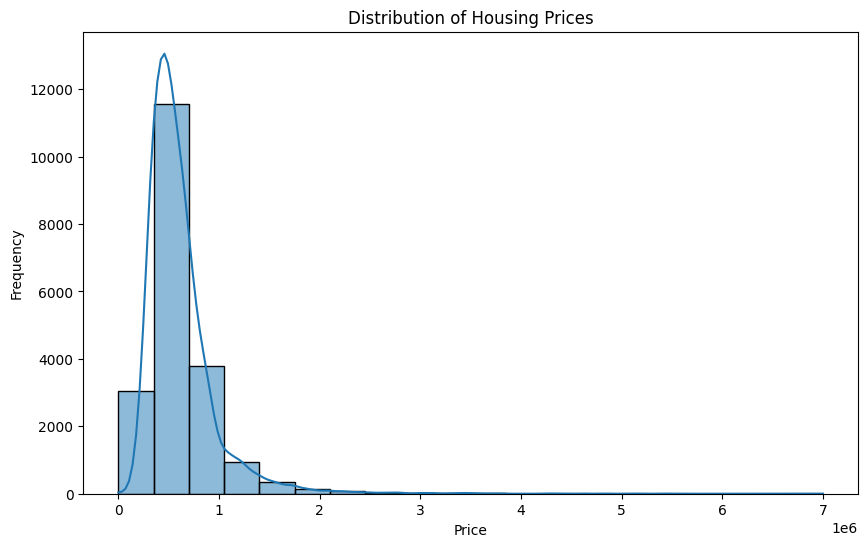

In [ ]:
# Data Visualization

# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

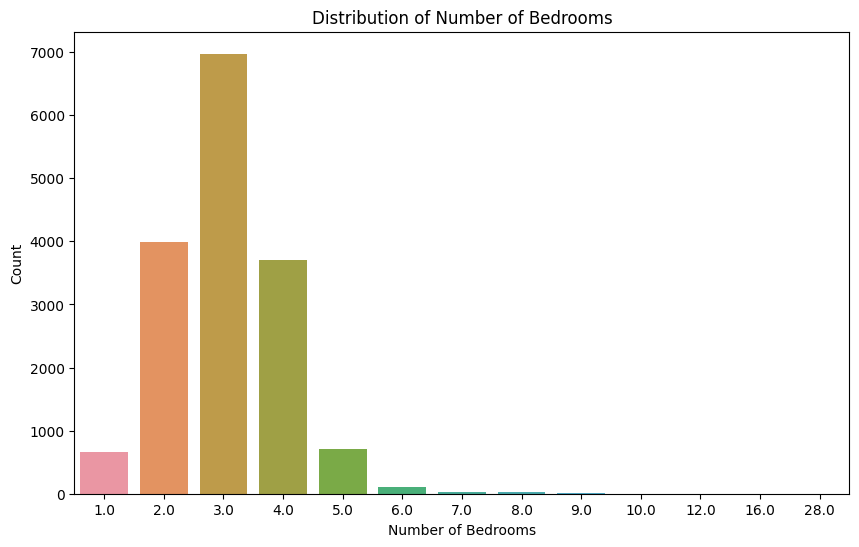

In [ ]:
#Count Plot - Distribution of Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='br', data=df)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

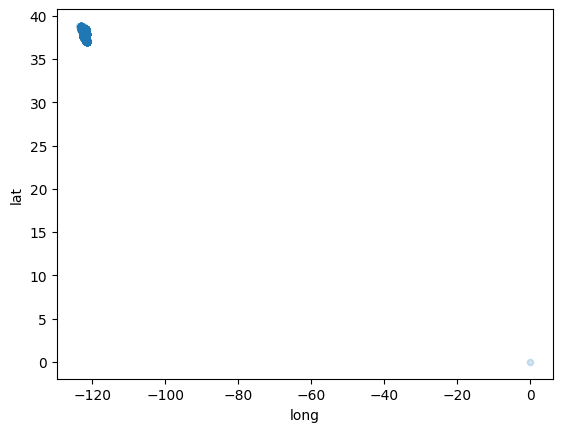

In [ ]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.2)
plt.savefig('map1.png')

## Removing Outliers and replacing missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df['br'] = imputer.fit_transform(df[['br']])
df['lsqft'] = imputer.fit_transform(df[['lsqft']])
df['bsqft'] = imputer.fit_transform(df[['bsqft']])
df['zip'] = imputer.fit_transform(df[['zip']])
df['lat'] = imputer.fit_transform(df[['lat']])
df['long'] = imputer.fit_transform(df[['long']])

# df['br'] = df['br'].interpolate(method='linear')
# df['lsqft'] = df['lsqft'].interpolate(method='linear')
# df['bsqft'] = df['bsqft'].interpolate(method='linear')
# df['zip'] = df['zip'].interpolate(method='linear')
# df['lat'] = df['lat'].interpolate(method='linear')
# df['long'] = df['long'].interpolate(method='linear')

df_filtered = df[(df['lat'] != 0) & (df['long'] != 0)]

# Display information about the filtered DataFrame
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  19999 non-null  object 
 1   city    19999 non-null  object 
 2   zip     19999 non-null  float64
 3   street  19999 non-null  object 
 4   price   19999 non-null  int64  
 5   br      19999 non-null  float64
 6   lsqft   19999 non-null  float64
 7   bsqft   19999 non-null  float64
 8   year    16492 non-null  float64
 9   date    19999 non-null  object 
 10  long    19999 non-null  float64
 11  lat     19999 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.0+ MB


<Axes: xlabel='long', ylabel='lat'>

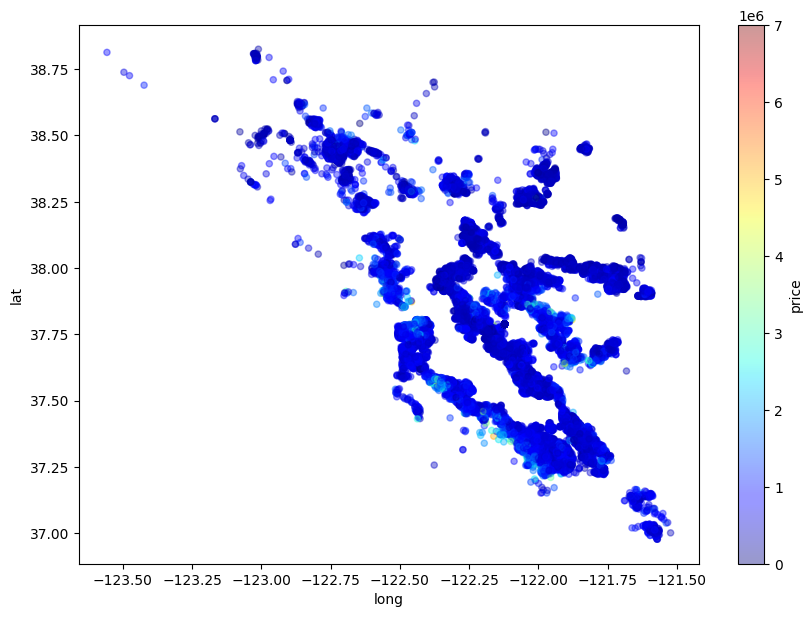

In [ ]:
df = df_filtered
df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

### The expenses houses seem to be in the southern part of the area.

<ipython-input-34-230001a1c6d3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


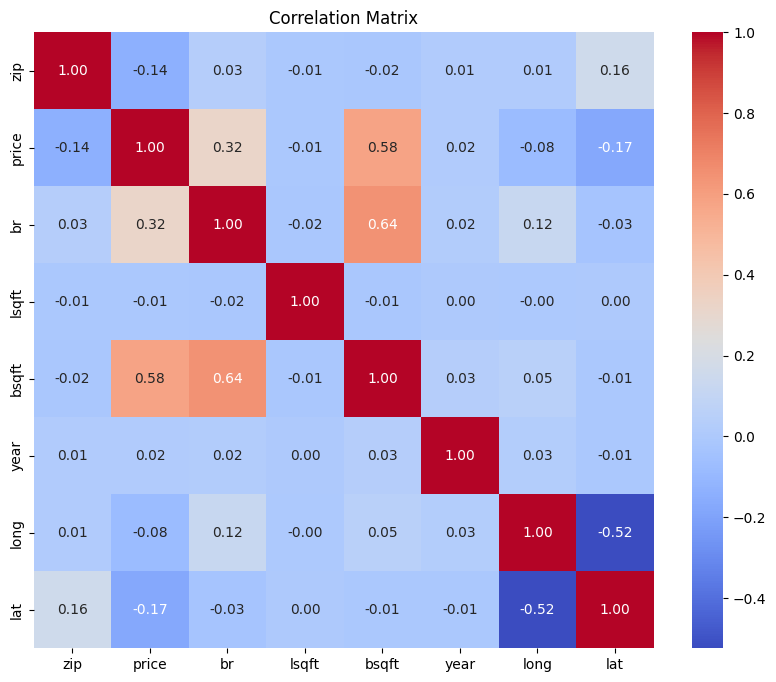

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Convert non-numeric columns to numeric using Label Encoding
# label_encoder = LabelEncoder()
# df['county_encoded'] = label_encoder.fit_transform(df['county'])
# df['city_encoded'] = label_encoder.fit_transform(df['city'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation coefficients for the 'price' column
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Display the correlation coefficients for each feature with respect to 'price'
print("Correlation with Price:")
print(price_correlations)

Correlation with Price:
price    1.000000
bsqft    0.581523
br       0.317991
year     0.015098
lsqft   -0.012007
long    -0.080116
zip     -0.140170
lat     -0.173946
Name: price, dtype: float64


<ipython-input-35-e6353a776613>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### key features influencing housing prices: square footage, number of bedrooms, zip code, and latitude.

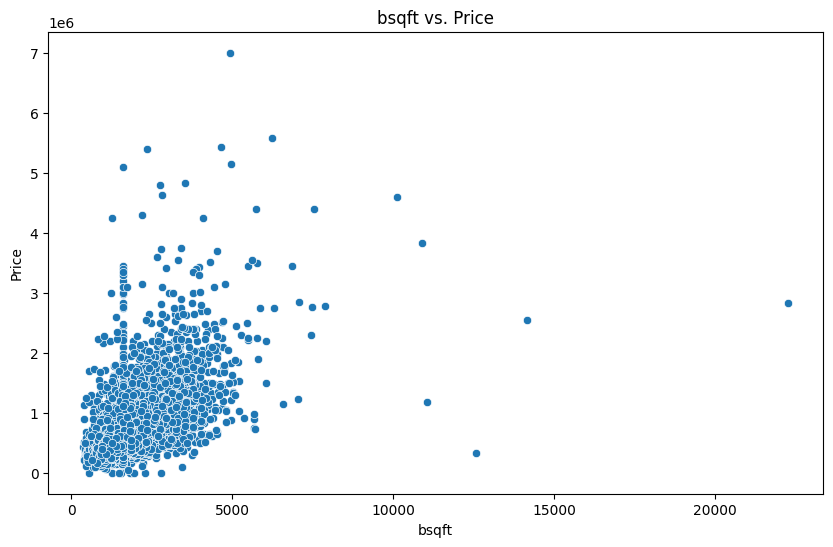

In [ ]:
# Scatter Plot: bsqft vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bsqft', y='price', data=df)
plt.title('bsqft vs. Price')
plt.xlabel('bsqft')
plt.ylabel('Price')
plt.show()

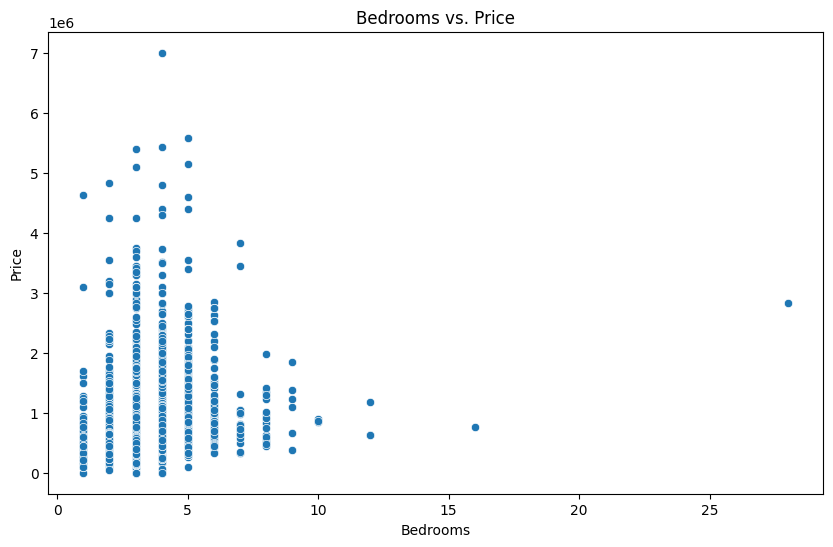

In [ ]:
# Scatter Plot: Bedrooms vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='br', y='price', data=df)
plt.title('Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

ANOVA Result: F_onewayResult(statistic=320.4689004505952, pvalue=3.370842330754861e-136)
The number of bedrooms has a significant effect on the price.
95% Confidence Interval for Average Price: (607699.5932020776, 617542.0370794365)


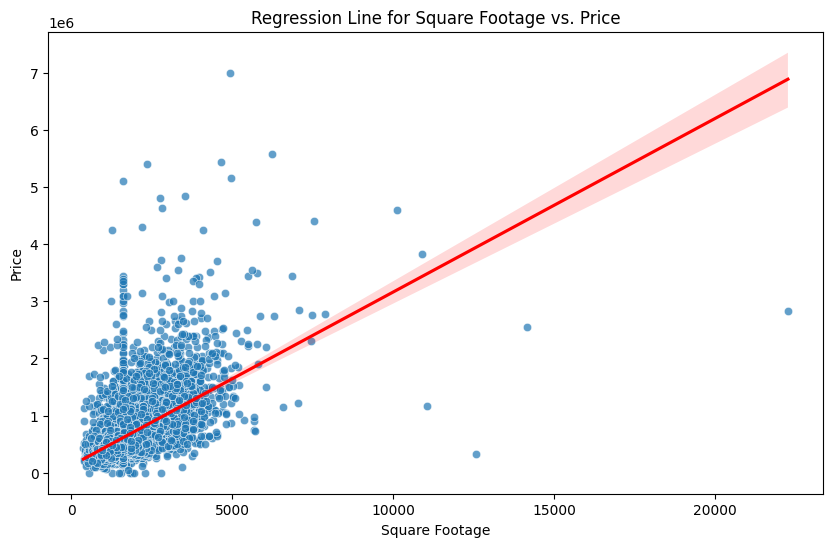

In [ ]:
#Inferential Data Analysis

# 1. Hypothesis Testing - Significance of Bedrooms

# Null hypothesis: There is no significant difference in price based on the number of bedrooms.
# Alternative hypothesis: There is a significant difference in price based on the number of bedrooms.

from scipy.stats import f_oneway

# Perform one-way ANOVA
result_anova = f_oneway(df['price'][df['br'] == 1], df['price'][df['br'] == 2], df['price'][df['br'] == 3])

# Print the ANOVA result
print(f'ANOVA Result: {result_anova}')
if result_anova.pvalue < 0.05:
    print('The number of bedrooms has a significant effect on the price.')
else:
    print('The number of bedrooms does not have a significant effect on the price.')

# 2. Confidence Intervals - Average Price

from statsmodels.stats import weightstats as stests

# Calculate confidence interval for average price
confidence_interval_price = stests.zconfint(df['price'])
print(f'95% Confidence Interval for Average Price: {confidence_interval_price}')

# 3. Visualize Regression Line with Scatter Plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bsqft', y='price', data=df, alpha=0.7)
sns.regplot(x='bsqft', y='price', data=df, scatter=False, color='red')
plt.title('Regression Line for Square Footage vs. Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

##Linear Regression

In [ ]:
# # Handle missing values
# df.fillna(0, inplace=True)

# Model Building (Example: Linear Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# # Features and target variable
# X = df[['bsqft', 'br', 'zip', 'lat']]
X = df[['bsqft', 'br', 'zip', 'lat', 'long', 'lsqft']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 70362367372.37042
R-squared: 0.44192816833767146


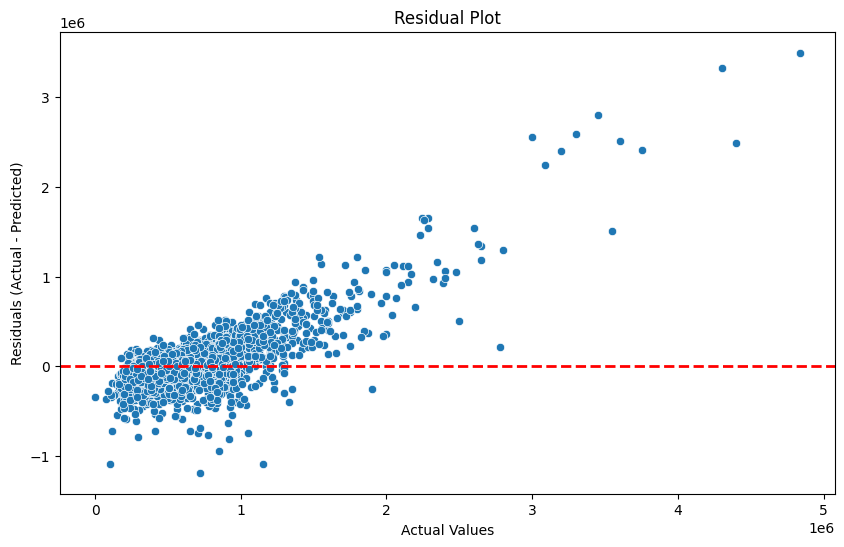

In [ ]:
# Residual plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

Mean Squared Error: 46125031392.72497
R-squared: 0.6341640891842943


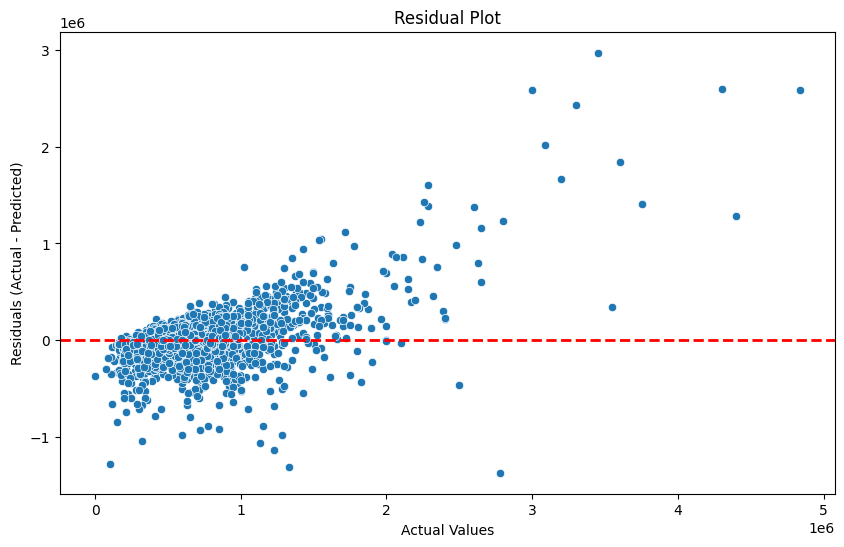

In [ ]:
# Residual plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [ ]:
# Additional: You can also print feature importances
print('\nFeature Importances:')
for feature, importance in zip(X.columns, random_forest.feature_importances_):
    print(f'{feature}: {importance}')


Feature Importances:
bsqft: 0.4242729409048136
br: 0.02215156571399865
zip: 0.11576755089713175
lat: 0.13935659139205622
long: 0.1361092611231574
lsqft: 0.1623420899688423


##SVM

In [ ]:
from sklearn.svm import SVR
import math

# Initialize the Support Vector Regression (SVR) model
svr_model = SVR(kernel='linear')  # You can experiment with different kernels (linear, rbf, poly, etc.)

# Train the model using standardized features
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svr_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_svm)
print(f'Root Mean Squared Error (SVR): {math.sqrt(mse)}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred_svm)
print(f'R-squared: {r2}')

Root Mean Squared Error (SVR): 358261.4944499358
R-squared: -0.01800503411605381


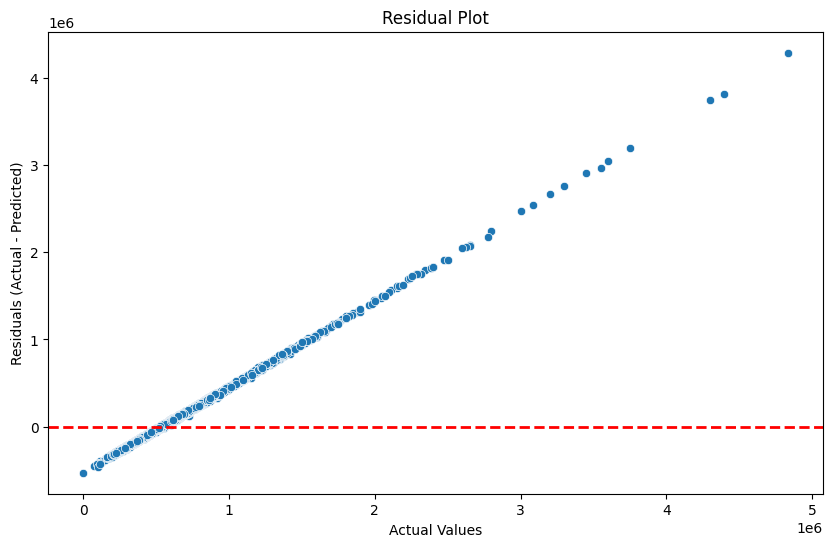

In [ ]:
# Residual plot
residuals = y_test - y_pred_svm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

## Gradient Boost

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

gb_model = ensemble.GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_gb)
print(f'Root Mean Squared Error: {math.sqrt(mse)}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred_gb)
print(f'R-squared: {r2}')

Root Mean Squared Error: 234968.47835991957
R-squared: 0.5621061274775565


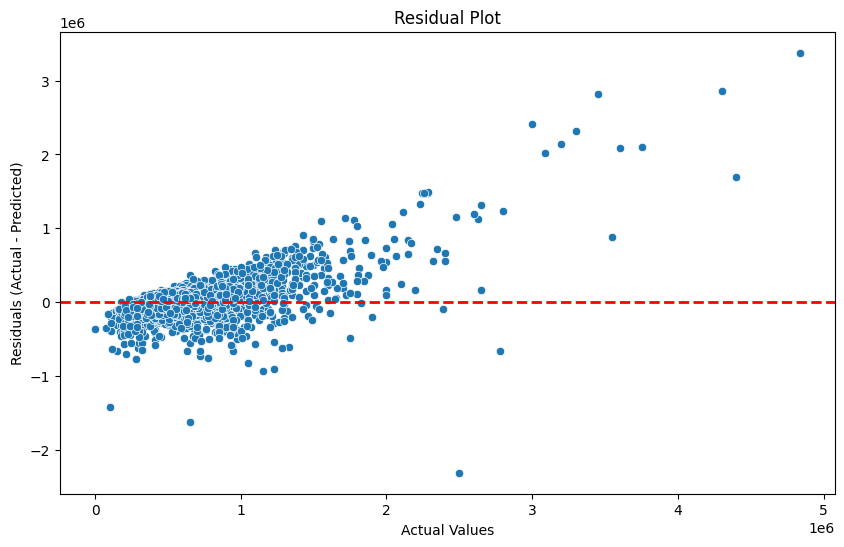

In [ ]:
# Residual plot
residuals = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred_xgb)
print(f'R-squared: {r2}')

Mean Squared Error: 42450264340.00523
R-squared: 0.6633101235863286


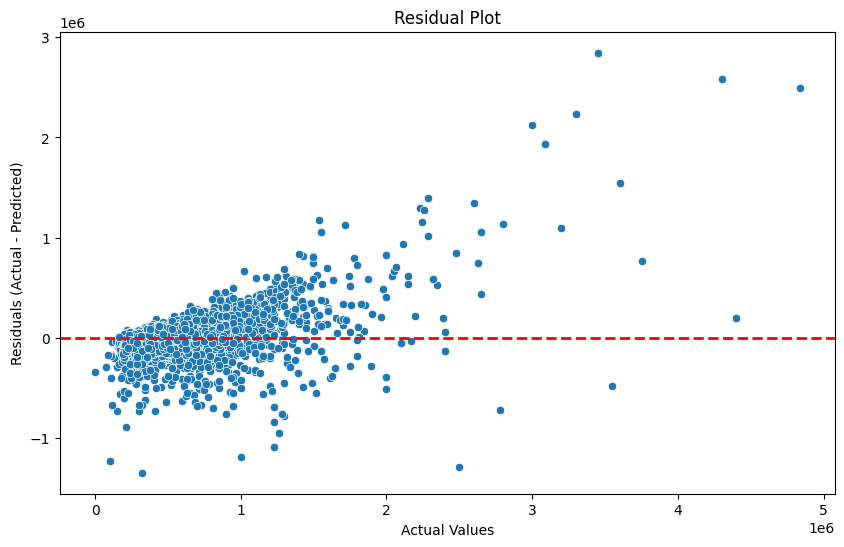

In [ ]:
# Residual plot
residuals = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()